# Assignment 3
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 <span style="color:red">(50 points)</span>
### Binary Classification
  1. Here, we will use the `ziptrain.csv` and `ziptest.csv` datasets from Session07. Upload them here as two separate datasets. 

In [3]:
ziptrain = pd.read_csv(r'C:\Users\Nicolas\Documents\YCBS 253\ziptrain.csv', sep=" ", header=None)
ziptest = pd.read_csv(r'C:\Users\Nicolas\Documents\YCBS 253\ziptest.csv', sep=" ", header=None)

  2. Explore the data in order to understand it. 

ziptrain

In [4]:
ziptrain.shape

(7291, 258)

In [6]:
ziptrain.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


Let's delete this last column full of NaNs. No idea what it is.

In [7]:
ziptrain = ziptrain.drop(257, axis=1)

In [8]:
ziptrain.iloc[:, 0].value_counts()

0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: 0, dtype: int64

It might be important to notice that there is an unequal number of digits.

In [9]:
ziptrain.isnull().sum().sum()

0

In [10]:
type(ziptrain.iloc[0])

pandas.core.series.Series

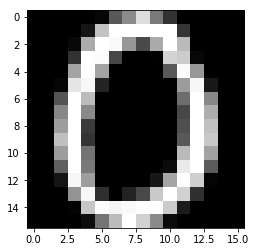

In [11]:
plt.imshow(ziptrain.iloc[254, 1:].values.reshape(16,16), "gray")

In [12]:
len(ziptrain)

7291

ziptest

In [13]:
ziptest.shape

(2007, 257)

In [14]:
ziptest.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [15]:
ziptest.iloc[:, 0].value_counts()

0    359
1    264
4    200
2    198
9    177
6    170
8    166
3    166
5    160
7    147
Name: 0, dtype: int64

It might be important to notice that there is an unequal number of digits.

In [16]:
ziptest.isnull().sum().sum()

0

  3. From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`.

In [17]:
seven = ziptrain.loc[ziptrain.iloc[:, 0] == 7]
two = ziptrain.loc[ziptrain.iloc[:, 0] == 2]
binar_train = pd.concat([seven, two], axis = 0, sort = False)
binar_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
3,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.273,0.684,0.96,0.450,...,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.596,0.912,1.00,0.290,...,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.00,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [18]:
seven = ziptest.loc[ziptest.iloc[:, 0] == 7]
two = ziptest.loc[ziptest.iloc[:, 0] == 2]
binar_test = pd.concat([seven, two], axis = 0, sort = False)
binar_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
30,7,-1.0,-0.99,0.700,0.283,-0.131,-0.598,-1.000,-1.000,-1.000,...,-0.700,0.734,-0.261,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
34,7,-1.0,-1.00,-0.862,0.000,0.296,-0.231,0.142,0.384,0.763,...,0.703,-0.448,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
39,7,-1.0,-1.00,-1.000,-1.000,-1.000,-0.930,-0.524,-0.524,-0.129,...,0.818,-0.045,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


  4. Project `binar_train` onto the first two principal components and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs?

In [19]:
pca = PCA(n_components = 2)
pca.fit(binar_train.iloc[:, 1:])
pca_train = pd.DataFrame(pca.transform(binar_train.iloc[:, 1:]))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca_train.head()

,0,1
0,-5.020459,-0.637950
1,-3.663988,-1.503925
2,-2.593551,-4.254389
3,-2.569493,-0.606041
4,-5.508919,-0.414047


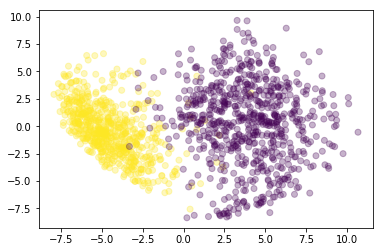

In [21]:
plt.scatter(pca_train.iloc[:, 0], pca_train.iloc[:,1], c= binar_train.iloc[:,0], alpha=0.3)

  5. Fit a logistic regression, in the new space,to separate digits $2$ and $7$. Evaluate the trainded model on `binar_test` using 
    + recall,
    + precision,
    + accuracy, and 
    + appropriate F-measure.

In [22]:
binar_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
30,7,-1.0,-0.99,0.700,0.283,-0.131,-0.598,-1.000,-1.000,-1.000,...,-0.700,0.734,-0.261,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
34,7,-1.0,-1.00,-0.862,0.000,0.296,-0.231,0.142,0.384,0.763,...,0.703,-0.448,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
39,7,-1.0,-1.00,-1.000,-1.000,-1.000,-0.930,-0.524,-0.524,-0.129,...,0.818,-0.045,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [23]:
binar_tf = pca.transform(binar_test.iloc[:, 1:])
binar_tf[:10]

array([[-6.62817378,  1.63817283],
       [-6.12266432,  0.13572076],
       [-6.70805908,  2.91618402],
       [-7.49044303,  4.57975126],
       [-7.11669287,  2.4756985 ],
       [-5.58062527, -0.91949499],
       [-4.13866969,  2.97070495],
       [-6.60418279,  1.07620611],
       [-6.03035048,  0.5039234 ],
       [-2.5625405 , -3.47846268]])

In [24]:
clf = LogisticRegression()
clf.fit(pca_train, binar_train.iloc[:, 0])
y_pred = clf.predict(binar_tf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
recall_score(binar_test.iloc[:, 0], y_pred, pos_label=7)

0.9523809523809523

In [26]:
precision_score(binar_test.iloc[:, 0], y_pred, pos_label=7)

0.9655172413793104

In [27]:
accuracy_score(binar_test.iloc[:, 0], y_pred)

0.9652173913043478

In [28]:
f1_score(binar_test.iloc[:, 0], y_pred, pos_label=7)

0.9589041095890412

  6. Build a confusion matrix for your predictions.

In [29]:
confusion_matrix(binar_test.iloc[:, 0], y_pred)

array([[193,   5],
       [  7, 140]], dtype=int64)

  7. Now, instead of using only $2$ principle components, project `binar_train` onto the first $m=2, 3, ...$ principal components (one $m$ at a time), and train a logistic classifier each time. Using `binar_test` for evaluation, choose an $m$ that gives the best classification. 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

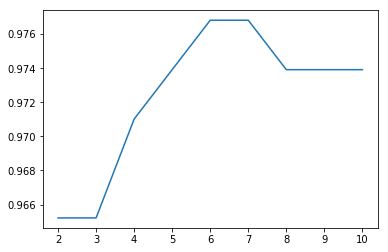

In [30]:
accuracies = []
for i in range(2, 11):
    pca = PCA(n_components = i)
    pca.fit(binar_train.iloc[:, 1:])
    pca_train = pd.DataFrame(pca.transform(binar_train.iloc[:, 1:]))
    binar_tf = pca.transform(binar_test.iloc[:, 1:])
    clf = LogisticRegression()
    clf.fit(pca_train, binar_train.iloc[:, 0])
    y_pred = clf.predict(binar_tf)
    acc = accuracy_score(binar_test.iloc[:, 0], y_pred)
    accuracies.append(acc)
plt.plot(range(2, 11), accuracies)

### Multi-Classification <span style="color:green">(BONUS: 25 points)</span>
  8. Project `ziptrain` (**not `binar_train`**) onto first two principal components and make a scatterplot to confirm wheather or not only two principal components separates **all** digits properly.

In [31]:
pca = PCA(n_components = 2)
pca.fit(ziptrain.iloc[:, 1:])
ziptrain_pca = pd.DataFrame(pca.transform(ziptrain.iloc[:, 1:]))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
ziptrain_pca.head()

,0,1
0,4.942676,-6.228920
1,6.964488,-1.157791
2,0.979480,1.928037
3,-2.515794,6.528194
4,2.686991,-0.301129


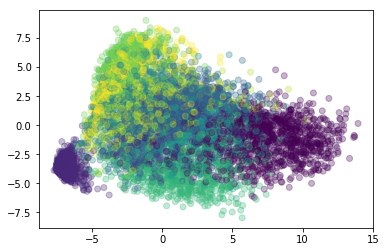

In [33]:
plt.scatter(ziptrain_pca.iloc[:, 0], ziptrain_pca.iloc[:,1], c= ziptrain.iloc[:,0], alpha=0.3)

  9. Use linear discriminant on `ziptrain` over the $256$ original pixels and build the confusion matrix for the trained model over `ziptrain` (**not `ziptest`**).

In [34]:
clf = LinearDiscriminantAnalysis()
clf.fit(ziptrain_pca, ziptrain.iloc[:,0])
y_pred = clf.predict(ziptrain_pca)
confusion_matrix(ziptrain.iloc[:, 0], y_pred)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

array([[ 961,    1,   42,   37,    0,   68,   85,    0,    0,    0],
       [   0, 1003,    0,    0,    0,    0,    2,    0,    0,    0],
       [  36,   34,  286,  157,   61,   34,   86,    0,   28,    9],
       [  36,    2,  121,  333,   62,   48,    5,   12,   29,   10],
       [   2,   58,   57,   69,  204,    7,   10,  102,   14,  129],
       [ 114,    3,  135,   99,   11,   82,  100,    2,    8,    2],
       [  90,   41,   53,    4,    3,   24,  448,    0,    1,    0],
       [   0,    2,    6,   14,   68,    0,    0,  425,    0,  130],
       [  14,   28,  107,  120,  188,    7,    3,   13,   36,   26],
       [   0,   18,    1,   33,  132,    1,    0,  271,    1,  187]],
      dtype=int64)

  10. Use linear disciminant in spaces of $m=2,3,...$ PCs to train your classifier. Choose the $m$ that gives the best classification result evaluated by the **precision** of predictions over `ziptest` dataset.

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

,Components,Precision
0,2,42
1,3,49
2,4,62
3,5,64
4,6,70
5,7,74
6,8,77
7,9,77
8,10,77


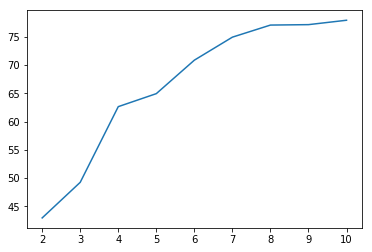

In [35]:
prec = []
for i in range(2, 11):
    pca = PCA(n_components = i)
    ziptest_pca = pd.DataFrame(pca.fit_transform(ziptest.iloc[:, 1:]))
    clf = LinearDiscriminantAnalysis()
    clf.fit(ziptest_pca, ziptest.iloc[:,0])
    y_pred = clf.predict(ziptest_pca)
    prec.append(precision_score(ziptest.iloc[:, 0], y_pred, average=None).mean()*100)
plt.plot(np.arange(2, 11), prec)
df = pd.DataFrame([np.arange(2, 11), prec], dtype="int").transpose()
df.columns = ['Components', 'Precision']
df

## Question 2 <span style="color:red">(50 points)</span>

The objective of this exercise is to understand the notions of underfitting and overfitting. Using cross-validation on simulated data, we will be able to visualize the two concepts.

##### Synthetic data
1. Generate 100 points equally distanced from -20 to 20 and save them in a `numpy` array `x`.

In [36]:
x = np.linspace(-20, 20, 100)

2. Create a new numpy array `y` defined as $y_i=\mathrm{sin}(x_i) + 0.05 x_i^3 + \varepsilon_i$ where $\varepsilon_i \sim \mathcal{N}(0,100^2)$, for $i=1,...,100$.

In [37]:
y = pd.Series(x).apply(lambda f: np.sin(f) + np.power(f, 3) + np.random.normal(0, 10000, 1)) 

3. Plot the scatter plot of `x` and `y`. Do you think that a linear model could fit this data?

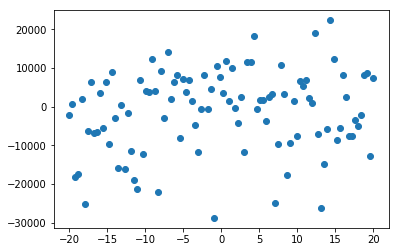

In [38]:
plt.scatter(x, y)

It could fit the data, but other models would be more appropriate. 

##### Underfitting vs. Overfitting
4. Fit a linear regression model and call it `model1` : $y=\beta_0 + \beta_1 x$ and add the fitted line over the scatter plot.

In [39]:
model1 = LinearRegression()
model1.fit(x.reshape(-1, 1), y)
model1.coef_
model1.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([136.25696021])

-1155.9186858308321

In [40]:
x2 = x = np.linspace(-20, 20, 100)
y2 = x2*model1.coef_ + model1.intercept_

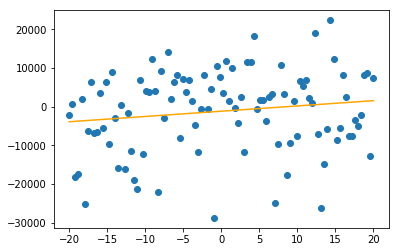

In [41]:
plt.scatter(x, y)
plt.plot(x2, y2, c="orange")
plt.show()

5. Compute the mean squared error of `model1`. **Hint** : You can use `sklearn.metrics.mean_squared_error`.

In [42]:
mean_squared_error(y, y2)

106624496.06514111

6. Fit a polynomial regression model with degree 5 and call it `model2` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_5 x^5$. **Hint** : You can use `sklearn.preprocessing.PolynomialFeatures` in order to create a **new** input array that includes $x^0$, $x^1$, $x^2$, $x^3$ ...

In [43]:
model2 = PolynomialFeatures(5)
model2_y = model2.fit_transform(x.reshape(-1, 1))
lr = LinearRegression()
lr.fit(model2_y, y)
y_pred_polyn = lr.predict(model2_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

7. Add the fitted curve over the scatter plot and compare `model2` and `model1`.

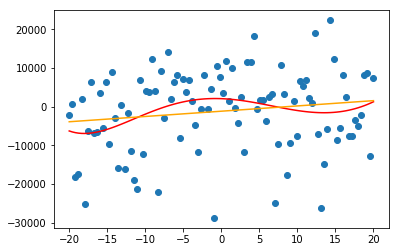

In [44]:
plt.scatter(x, y)
plt.plot(x, y_pred_polyn, c='red')
plt.plot(x, y2, c="orange")
plt.show()

8. Compute the mean squared error of `model2`.

In [45]:
mean_squared_error(y_pred_polyn, y)

101527717.31105213

9. Fit a polynomial regression model with degree 20 and call it `model3` : $y=\beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_{20} x^{20}$.

In [46]:
model3 = PolynomialFeatures(20)
model3_x = model2.fit_transform(x.reshape(-1, 1))
lr = LinearRegression()
lr.fit(model3_x, y)
y_pred_polyn20 = lr.predict(model3_x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

10. Add the fitted curve over the scatter plot and compare the three models. What is the mean squared error of `model3`?

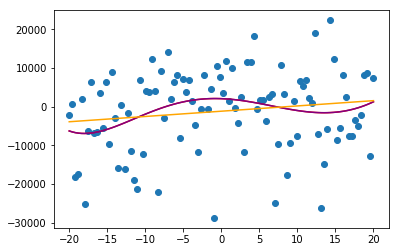

In [47]:
plt.scatter(x, y)
plt.plot(x, y_pred_polyn, c='red')
plt.plot(x, y_pred_polyn20, c='purple')
plt.plot(x, y2, c="orange")
plt.show()

In [48]:
mean_squared_error(y_pred_polyn20, y)

101527717.31105213

##### Cross-Validation
11. Using $10$-fold cross-validation, compute the **averaged validation** mean squared errors for all possible polynomial models by varying the degree of the polynomial model from $1$ to $20$.

In [49]:
n = len(x)
kf_10 = KFold(n_splits=10, shuffle=True)

lr = LinearRegression()
mse = []

for i in np.arange(1, 21):
    model = PolynomialFeatures(20)
    model_x = model2.fit_transform(x.reshape(-1, 1))
    lr.fit(model_x, y)
    y_pred = lr.predict(model_x)
    score = cross_val_score(lr, np.array(y_pred).reshape(-1, 1), \
                                            y.ravel(), cv=kf_10, \
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
mse

[-103180982.05920881,
 -107005038.90447088,
 -104048920.45769085,
 -109042980.08112104,
 -105847968.81324951,
 -104646217.33599548,
 -106066634.76137114,
 -104392540.85347459,
 -104732334.08720772,
 -104631975.94359691,
 -106489424.35706016,
 -105168167.67234096,
 -104350211.64308569,
 -106206709.55071425,
 -104369179.81521241,
 -106056377.73070422,
 -105018877.3198047,
 -106723304.963746,
 -104886268.76408634,
 -106757995.60280222]

12. Plot the **averaged validation** MSE with respect to the degree of the model. **Hint** : $x$-axis is defined as the degree of the polynomial model, i.e., $1,2,3,...,20$ and $y$-axis is its associated MSE.

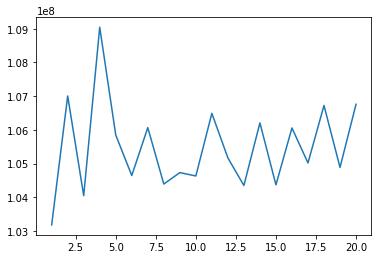

In [51]:
axis = np.arange(1, 21)
plt.plot(axis, np.abs(mse))

##### LASSO
13. Using $10$-fold cross-validation and the LASSO regularization, fit the polynomial model with degree 20 and call it `model4`. What is the best regularization constant? Show it in a curve. **Hint** : Here, you need to apply the $10$-fold cross-validation over a sequence of regularization constants. The figure will show you what is the best regularization constant, based on MSE or $R^2$.

LassoCV(alphas=array([18.     , 18.07071, ..., 24.92929, 25.     ]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

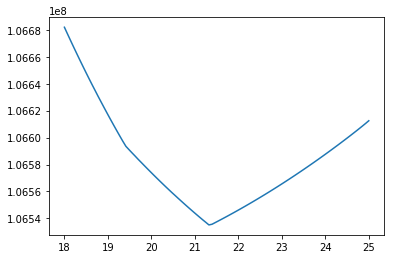

In [54]:
model4 = PolynomialFeatures(20)
model4_x = model2.fit_transform(x.reshape(-1, 1))
alpha_values = np.linspace(18, 25, num= 100)
lrcv = LassoCV(alphas = alpha_values, cv = 10, normalize = True)
lrcv.fit(model4_x, y)
cv_values = np.mean(lrcv.mse_path_, axis=1)
alpha_values = lrcv.alphas_
plt.plot(alpha_values, cv_values)

14. Based on the LASSO model, what is the best final model? **Hint** : Once you have chosen the best regularization constant, you can extract the associated coefficients.

In [71]:
df = pd.DataFrame(np.column_stack([cv_values, alpha_values]), columns=["CV", "Alpha"]).sort_values(by=\
                                         "CV").reset_index(drop=True)
df.head(1)

,CV,Alpha
0,1.065352e+08,21.323232
